## Исследование популярности компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Цель

Цель работы: выявить закономерности, определяющие успешность игры. Для выполнения поставленной цели необходимо выполнить следующие задачи:
1. Провести исследователький анализ данных и ответить на вопросы:

    - Сколько игр выпускалось в разные годы?
    - Как менялись продажи по платформам?
    - За какой характерный срок появляются новые и исчезают старые платформы?
    - Какие платформы лидируют по продажам, растут или падают?
    - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
    - Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
    
2. Составить портрет пользователя каждого региона и определить для пользователя каждого региона (NA, EU, JP):

     - Самые популярные платформы (топ-5).
     - Самые популярные жанры (топ-5).
     - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
     
     
3. Проверить гипотезы:

   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Изучение данных

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

Загрузим данные и посмотрим на них.

In [2]:
path = 'C:\\Users\plea\OneDrive\Документы\Практикум\Проекты для гитхаб\Игры'
data = pd.read_csv(path + '/games.csv', sep=',')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [5]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [6]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [7]:
data['Name'].value_counts()

Need for Speed: Most Wanted                          12
Madden NFL 07                                         9
FIFA 14                                               9
Ratatouille                                           9
LEGO Marvel Super Heroes                              9
                                                     ..
Dragon Ball Z: Harukanaru Densetsu                    1
I Spy: Fun House                                      1
Cheer We Go!                                          1
Final Fantasy XII International Zodiac Job System     1
Peppa Pig: Theme Park Fun                             1
Name: Name, Length: 11559, dtype: int64

In [8]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

### Выводы

Первый взгляд на данные выявил некорректность названий столбцов, некорректный формат в столбцах "Year_of_Release" и "User_Score". Присутствует определённое количество пропусков. А также в столбце "User_Score" присутствует значение "tbd", то есть "To Be Determined" - "Будет определено". По сути это отсутствующее значение и подобрать корректную замену мы не можем, но и удалить совсем тоже.

## Предобработка данных

### Корректировка названий столбцов

Первым делом приведём названия столбцов к нижнему регистру. 

In [9]:
new_names = ['game_name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
             'critic_score', 'user_score', 'rating']
data.set_axis(new_names, axis='columns', inplace=True)
data.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

Посмотрим как обстоят дела с пропусками.

In [10]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
print(report)

                 missing_values  % of total
game_name                     2        0.00
platform                      0        0.00
year_of_release             269        0.02
genre                         2        0.00
na_sales                      0        0.00
eu_sales                      0        0.00
jp_sales                      0        0.00
other_sales                   0        0.00
critic_score               8578        0.51
user_score                 6701        0.40
rating                     6766        0.40


В столбцах "Название игры" и "Жанр" по два пропуска. Их проще удалить. С пропусками в столбцах с оценками мы сделать ничего не можем. Объём пропусков этих столбцах достаточно большой. В столбце "Год выпуска" пропущенные значения корректнее удалить: заменить мы их не можем, объём пропусков всего 2%, а при дальнейшем анализе пропуски будут мешать.

In [11]:
data.dropna(subset=['game_name', 'genre', 'year_of_release'], inplace=True)
data.isnull().sum()

game_name             0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

### Замена типа данных

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [13]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
data['critic_score'] = data['critic_score'].astype('int', errors='ignore')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [14]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### Поиск дубликатов

Посмотрим как обстоят дела с дубликатами.

In [16]:
data.duplicated().sum()

0

Дубликатов нет.

### Сумма продаж по всем регионам

Посчитаем сумму продаж по всем регионам.

In [17]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Выводы

Мы исправили названия столбцов, удалили пропуски, где возможно, в столбце "Год выпуска" заменили тип на целочисленный, проверили данные на наличие дубликатов и добавили столбец с суммой продаж по всем регионам. Можем приступать к анализу данных.

## Исследовательский анализ данных

Нам необходимо ответить на следующие вопросы:
- Сколько игр выпускалось в разные годы?
- Как менялись продажи по платформам?
- За какой характерный срок появляются новые и исчезают старые платформы?
- Какие платформы лидируют по продажам, растут или падают?
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
- Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Сколько игр выпускалось в разные годы?

Для ответа на этот вопрос сгруппируем данные по году выпуска и посчитаем количество выпущенных игр.

In [18]:
year_of_release_group = data.groupby('year_of_release')['year_of_release'].value_counts()
year_of_release_group.sort_values(ascending=False)

year_of_release  year_of_release
2008             2008               1427
2009             2009               1426
2010             2010               1255
2007             2007               1197
2011             2011               1136
2006             2006               1006
2005             2005                939
2002             2002                829
2003             2003                775
2004             2004                762
2012             2012                653
2015             2015                606
2014             2014                581
2013             2013                544
2016             2016                502
2001             2001                482
1998             1998                379
2000             2000                350
1999             1999                338
1997             1997                289
1996             1996                263
1995             1995                219
1994             1994                121
1993             1993   

Количество выпускаемых игр менялось с развитием компьютерных технологий. И количество выпущенных игр до 1995 года незначительно. По сумме продаж по годам актуальный период с 2002 по 2016 год.

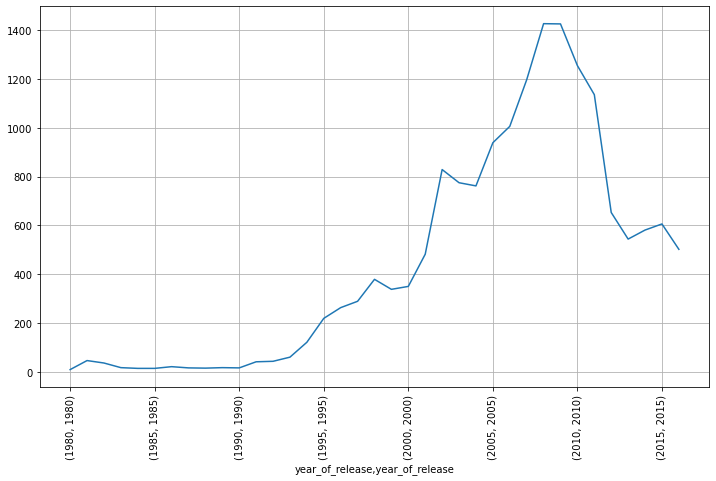

In [19]:
plt.figure(figsize=(12,7))
year_of_release_group.plot(style='-', grid=True)
plt.xticks(rotation=90)
plt.show()

### Как менялись продажи по платформам?

Посмотрим количество продаж по платформам и определим наиболее продаваемые платформы.

In [20]:
platform_group = data.groupby('platform')['all_sales'].sum()
platform_group.sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

Посмотрим как менялись продажи по годам для десяти топовых платформ.

In [21]:
platform_top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']
platform_group_top_10 = data.query('platform in @platform_top')
platform_group_top_10_pivot = platform_group_top_10.pivot_table(index='platform', columns='year_of_release', 
                                                  values='all_sales', aggfunc='sum')
platform_group_top_10_pivot

year_of_release,1985,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DS,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS,NaN,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,...,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18


По полученной таблице можем сделать вывод: не всё, что в топе ещё продаётся. Продажи игр на платформе PS2, закончились ещё в 2011 году. Рассмотрим продажи по устаревшим платформам подробнее.

In [22]:
platform_group = data.groupby(['platform', 'year_of_release']).agg({'all_sales':sum})
platform_group_PS2 = platform_group.query('platform == "PS2"')
platform_group_PS2

all_sales
platform year_of_release           
PS2      2000                 39.17
         2001                166.43
         2002                205.38
         2003                184.31
         2004                211.81
         2005                160.66
         2006                103.42
         2007                 75.99
         2008                 53.90
         2009                 26.40
         2010                  5.64
         2011                  0.45

Мы видим, что выпуск игр на этой платформе начался в 2000 году, до 2002 уровень продаж растёт, в 2002 несколько снижается, в 2004 повысился и после пошёл на спад.

In [23]:
platform_group_PS = platform_group.query('platform == "PS"')
platform_group_PS

all_sales
platform year_of_release           
PS       1994                  6.03
         1995                 35.96
         1996                 94.70
         1997                136.17
         1998                169.49
         1999                144.53
         2000                 96.37
         2001                 35.59
         2002                  6.67
         2003                  2.07

По платформе PS максимум продаж зафиксирован в 1998 году.

In [24]:
platform_group_GBA = platform_group.query('platform == "GBA"')
platform_group_GBA

all_sales
platform year_of_release           
GBA      2000                  0.07
         2001                 61.53
         2002                 74.16
         2003                 56.67
         2004                 77.91
         2005                 33.86
         2006                  5.28
         2007                  3.40

In [25]:
platform_group_DS = platform_group.query('platform == "DS"')
platform_group_DS

all_sales
platform year_of_release           
DS       1985                  0.02
         2004                 17.27
         2005                130.14
         2006                119.81
         2007                146.94
         2008                145.31
         2009                119.54
         2010                 85.02
         2011                 26.18
         2012                 11.01
         2013                  1.54

In [26]:
platform_group_PC = platform_group.query('platform == "PC"')
platform_group_PC

all_sales
platform year_of_release           
PC       1985                  0.04
         1988                  0.03
         1992                  3.03
         1994                 12.87
         1995                  4.22
         1996                 10.58
         1997                 11.27
         1998                  3.26
         1999                  4.74
         2000                  4.66
         2001                  5.47
         2002                  8.57
         2003                  8.84
         2004                 10.39
         2005                  4.37
         2006                  2.85
         2007                  9.28
         2008                 12.42
         2009                 16.91
         2010                 24.28
         2011                 35.03
         2012                 23.22
         2013                 12.38
         2014                 13.28
         2015                  8.52
         2016                  5.25

На примере этих платформ мы видим, что рост продаж наблюдается в течение 4-5 лет, затем наступает спад. Исключение составляет платформа PC, продажи игр на которой на протяжении практически всего рассматриваемого периода меняются незначительно. Подъёмы продаж по данной платформе отмечаются через каждые 7 лет. Рассмотрим платформы, продажи игр на которых продолжаются.

In [27]:
platform_new = ['X360', 'PS3', 'Wii', 'PS4', 'PSP', '3DS', 'PC', 'XOne', 'WiiU', 'PSV']
years_of_release = [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
                    2016]
platform_group_platform = data.query('platform in @platform_new')


In [28]:
platform_group_years = platform_group_platform.query('year_of_release in @years_of_release')
platform_group_years_pivot = platform_group_years.pivot_table(index='platform', columns='year_of_release', values='all_sales', 
                                                              aggfunc='sum')
platform_group_years_pivot

year_of_release,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
PC,3.26,4.74,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,NaN,NaN,NaN,NaN,NaN,NaN,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
PSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


Оптимальным периодом для построения прогноза будет с 2010 до 2015 год. 2016 год рассматривать не будем, так как данные по этому году не полные и могут исказить результат. В этот период попадают также платфрмы DS и PS2, продажи игр на которых закончились в 2013 и 2011 году соответственно, но их рассматривать не будем. Возможно, есть смысл сократить актуальные период до 2013-2015 годов, поскольку в этом периоде будут полные данные обо всех рассматриваемых платформах. Возможно позднее скорректируем.

### Какие платформы лидируют по продажам, растут или падают?

На основе выводов по предыдущему вопросу рассмотрим лидирующие платформы.

In [29]:
year_of_release = ['2010', '2011', '2012', '2013', '2014', '2015']
platform_group_years_opt = data.query('platform in @platform_new')


In [30]:
platform_group_years_opt_year = platform_group_years_opt.query('year_of_release in @year_of_release')
platform_group_years_opt_pivot = platform_group_years_opt.pivot_table(index='platform', columns='year_of_release', 
                                                  values='all_sales', aggfunc='sum')
platform_group_years_opt_pivot

year_of_release,1985,1988,1992,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
PC,0.04,0.03,3.03,12.87,4.22,10.58,11.27,3.26,4.74,4.66,...,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
PSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


Лидируют по продажам PS4, XOne, 3DS, PS3, WiiU. Продажи первых двух растут, а последних трёх падают. Также не стоит сбрасывать со счетов PC. 
    Построим для этих платформ диаграмму размаха по глобальным продажам игр.

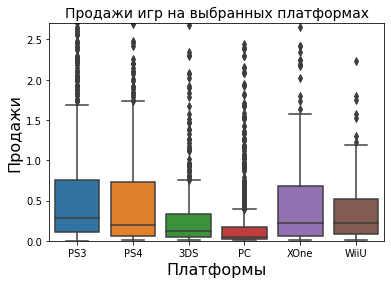

In [31]:
df = platform_group_years_opt.query('platform in ["PS4", "XOne", "3DS", "PS3", "WiiU", "PC"]')
sns.boxplot(x='platform', y='all_sales', data=df)
plt.title("Продажи игр на выбранных платформах", fontsize=14)
plt.xlabel("Платформы", fontsize=16)
plt.ylabel("Продажи", fontsize=16)
plt.ylim(0, 2.7)

plt.show()

В целом диаграмма размаха подтверждает выводы, сделанные ранее. Платформы PS4 и XOne лидируют. У 3DS, PS3, WiiU размах заметно меньше. PC и размах имеет небольшой, и продаж гораздо меньше, но игры на этой платформе много лет стабильно продаются.

### Влияние отзывов пользователей и критиков на продажи.

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

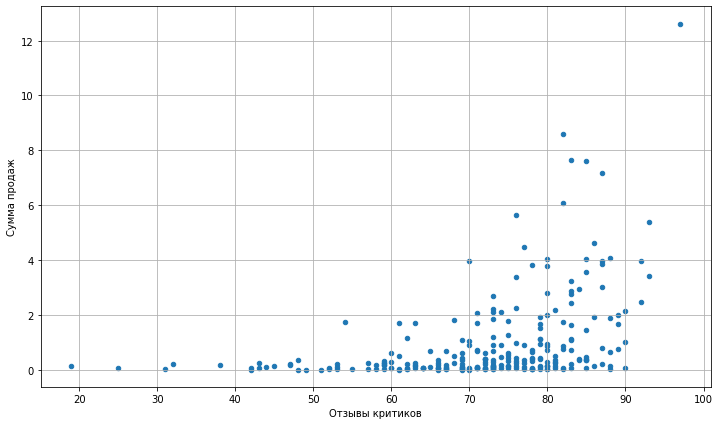

In [32]:
data_ps4 = data.query('platform == "PS4"')
data_ps4.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, figsize=(12, 7))
plt.xlabel("Отзывы критиков")
plt.ylabel("Сумма продаж")
plt.show()

По диаграмме мы видим, что сумма продаж на прямую зависит от оценки критиков. Оценки в большей степени высокие: оценок меньше 60 баллов немного.

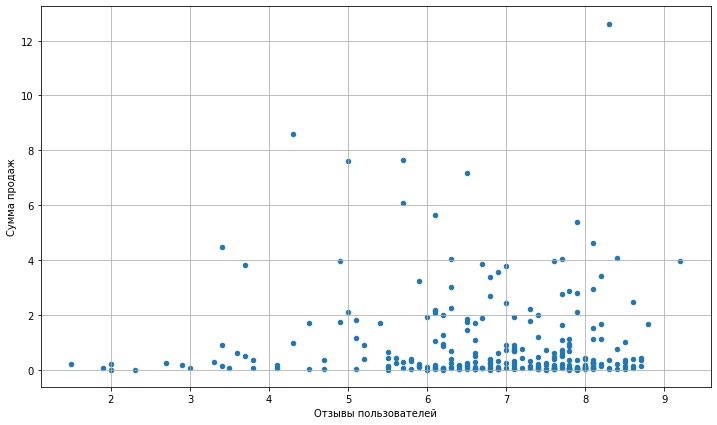

In [33]:
data_ps4_no_tbd = data_ps4.query('user_score != "tbd"')
data_ps4_no_tbd['user_score'] = pd.to_numeric(data_ps4_no_tbd['user_score'])
data_ps4_no_tbd.plot(x='user_score', y='all_sales', kind='scatter', grid=True, figsize=(12, 7))
plt.xlabel("Отзывы пользователей")
plt.ylabel("Сумма продаж")
plt.show()

От отзывов пользователей зависимость заметно меньше. Посмотрим, что нам покажет корреляция.

In [34]:
data_ps4['critic_score'].corr(data_ps4['all_sales'])

0.40656790206178123

In [35]:
data_ps4_no_tbd['user_score'].corr(data_ps4_no_tbd['all_sales'])

-0.03195711020455644

Оценка критиков по этой платформе влияет на продаваемость игр. А отзывы пользователей почти не влияют. На оценку пользователей ориентироваться не стоит, а к критикам стоит прислушаться. Посмотрим как дело обстоит с остальными платформами.

In [36]:
platform_group_years_opt['critic_score'].corr(platform_group_years_opt['all_sales'])

0.22380201275771555

In [37]:
data_no_tbd = platform_group_years_opt.query('user_score != "tbd"')
data_no_tbd['user_score'] = pd.to_numeric(data_no_tbd['user_score'])
data_no_tbd['user_score'].corr(data_no_tbd['all_sales'])

0.07250812371276301

А по всем платформам картина несколько иная: зависимость от оценки критиков меньше, а от оценки пользователей чуть больше.

### Что можно сказать о самых прибыльных жанрах? 

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [38]:
data_genre = data.groupby('genre').agg({'game_name' : 'count', 'all_sales': ['sum', 'median', 'mean']})
data_genre.columns=['count', 'sum_sales', 'median_sale', 'mean_sale']
data_genre.sort_values(by='sum_sales', ascending=False)

,count,sum_sales,median_sale,mean_sale
genre,,,,
Action,3307,1716.52,0.19,0.519057
Sports,2306,1309.67,0.22,0.567940
Shooter,1296,1041.36,0.24,0.803519
Role-Playing,1481,931.08,0.18,0.628683
Platform,878,825.55,0.27,0.940262
Misc,1721,790.29,0.16,0.459204
Racing,1226,723.49,0.19,0.590122
Fighting,837,442.66,0.21,0.528865
Simulation,857,387.96,0.15,0.452695


Самые распространённые жанры: Action, Sports, Misc, Role-Playing, Shooter. Прибыльные: Platform, Shooter и Role-Playing. По сумме продаж лидируют: Action, Sports, Shooter. Самые не популярные и не прибыльные: стратегии и пазлы. А такой жанр как "Adventure" имеет приличное количество продаж, но сумма продаж и среднее минимальны.

### Выводы

Количество выпускаемых игр менялось с развитием компьютерных технологий. И количество игр, выпущенных до 1995 года, незначительно. Больше всего игр было выпущенно в 2008-2009 годах. По сумме продаж по годам актуальный период с 2002 по 2016 год.
Самые продаваемые платформы: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS. Но не всё, что в топе ещё продаётся. Продажи игр на платформе PS2, закончились ещё в 2011 году.

Рост продаж наблюдается в течение 4-5 лет, затем наступает спад. Период спада более размытый: какие-то платформы уходят с рынка за 2-3 года, какие-то за 7-8 лет. Исключение составляет платформа PC, продажи игр на которой на протяжении практически всего рассматриваемого периода меняются незначительно. Подъёмы продаж по данной платформе отмечаются через каждые 7 лет.

Оптимальным периодом для построения прогноза будет с 2010 до 2015 год. 2016 год рассматривать не будем, так как данные по этому году не полные и могут исказить результат. В этот период попадают также платфрмы DS и PS2, продажи игр на которых закончились в 2013 и 2011 году соответственно, но их рассматривать не будем. Возможно, есть смысл сократить актуальные период до 2013-2015 годов, поскольку в этом периоде будут полные данные обо всех рассматриваемых платформах.

Лидируют по продажам PS4, XOne, 3DS, PS3, WiiU. Продажи первых двух растут, а последних трёх падают. Также не стоит сбрасывать со счетов PC.

Платформы PS4 и XOne лидируют как по количеству и объёму продаж, так и по размаху. У 3DS, PS3, WiiU размах заметно меньше. PC и размах имеет небольшой, и продаж гораздо меньше, но игры на этой платформе много лет стабильно продаются.

Сумма продаж платформы PS4 на прямую зависит от оценки критиков. Оценки в большей степени высокие: оценок меньше 60 баллов немного. А отзывы пользователей не только почти не влияют, но и зависимость обратная. На оценку пользователей ориентироваться не стоит, а к критикам стоит прислушаться. По всем платформам картина несколько иная: продажи одинаково несильно зависят как от оценки критиков, так и пользователей.

Самые распространённые жанры: Action, Sports, Misc, Role-Playing, Shooter. Прибыльные: Platform, Shooter и Role-Playing. По сумме продаж лидируют: Action, Sports, Shooter. Самые не популярные и не прибыльные: стратегии и пазлы. А такой жанр как "Adventure" имеет приличное количество продаж, но сумма продаж и среднее минимальны.

## Портрет каждого региона

Нам необходимо определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы

Топ-5 платформ будем определять из платформ, игры на основе которых продаются на текущий момент. Соответственно используем DataFrame, сформированный в п.5.3. Поскольку, как мы убедились ранее, некоторые лидирующие по продажам платформы уже ушли с рынка.

In [39]:
platform_group_na = platform_group_years_opt.groupby('platform').agg({'na_sales': 'sum', 'all_sales' : 'sum'})
platform_group_na['part_of_all'] = (platform_group_na['na_sales'] / platform_group_na['all_sales']).round(2)
platform_group_na['persent'] = (platform_group_na['na_sales'] / platform_group_na['na_sales'].sum()).round(2)
platform_group_na.sort_values(by='persent', ascending=False).head()

,na_sales,all_sales,part_of_all,persent
platform,,,,
X360,595.74,961.24,0.62,0.30
Wii,486.87,891.18,0.55,0.24
PS3,390.13,931.34,0.42,0.19
PC,93.34,255.76,0.36,0.05
PS4,108.74,314.14,0.35,0.05


Самая популярная платформа в Латинской Америке - X360: 33% продаж по региону. 61% процент всех продаж игр на этой платформе приходится на Латинскую Америку.

In [40]:
platform_group_eu = platform_group_years_opt.groupby('platform').agg({'eu_sales':'sum', 'all_sales':'sum'})
platform_group_eu['part_of_all'] = (platform_group_eu['eu_sales'] / platform_group_eu['all_sales']).round(2)
platform_group_eu['persent'] = (platform_group_eu['eu_sales'] / platform_group_eu['eu_sales'].sum()).round(2)
platform_group_eu.sort_values(by='persent', ascending=False).head()

,eu_sales,all_sales,part_of_all,persent
platform,,,,
PS3,327.21,931.34,0.35,0.24
X360,268.32,961.24,0.28,0.20
Wii,258.32,891.18,0.29,0.19
PC,140.37,255.76,0.55,0.10
PS4,141.09,314.14,0.45,0.10


В Европе популярна платформа PS3: 28% всех продаж по региону, по платформе - 36%.

In [41]:
platform_group_jp = platform_group_years_opt.groupby('platform').agg({'jp_sales':'sum', 'all_sales':'sum'})
platform_group_jp['part_of_all'] = (platform_group_jp['jp_sales'] / platform_group_jp['all_sales']).round(2)
platform_group_jp['persent'] = (platform_group_jp['jp_sales'] / platform_group_jp['jp_sales'].sum()).round(2)
platform_group_jp.sort_values(by='persent', ascending=False).head()

,jp_sales,all_sales,part_of_all,persent
platform,,,,
3DS,100.62,257.81,0.39,0.26
PS3,79.41,931.34,0.09,0.20
PSP,75.88,289.53,0.26,0.20
Wii,68.28,891.18,0.08,0.18
PSV,21.84,53.81,0.41,0.06


В Японии предпочитают платформу DS3: 36% продаж по региону и 38% продаж по платформе.

In [42]:
platform_group_other = platform_group_years_opt.groupby('platform').agg({'other_sales':'sum', 'all_sales':'sum'})
platform_group_other['part_of_all'] = (platform_group_other['other_sales'] / platform_group_other['all_sales']).round(2)
platform_group_other['persent'] = (platform_group_other['other_sales'] / platform_group_other['other_sales'].sum()).round(2)
platform_group_other.sort_values(by='persent', ascending=False).head()

,other_sales,all_sales,part_of_all,persent
platform,,,,
PS3,134.59,931.34,0.14,0.30
X360,84.88,961.24,0.09,0.19
Wii,77.71,891.18,0.09,0.17
PS4,48.35,314.14,0.15,0.11
PSP,40.76,289.53,0.14,0.09


В других регионах пользуется популярностью платформа PS3: 35% продаж по региону и 15% продаж по платформе.

В каждом регионе есть свои препочтения по платформам. Так в Латинской Америке предпочитают X360, PS3, Wii, PS4, 3DS.
В Европе: PS3, X360, PS4, PC, Wii.
В Японии: 3DS, PS3, PSP, PSV, Wii.
В других регионах: PS3, X360, PS4, Wii, PC.
Как мы видим, есть платформы, которые популярны везде, например: PS3 и Wii. Процент продаж игр на самой популярной по регионам платформы PS3 колеблется от 22% до 36%. Доля продаж игр на платформе Wii колеблется от 7% до 12%. Платформы X360 и PS4 не популярны только в Японии, в остальных регионах доля продаж составляет от 19% до 33% и от 9% до 16% соответственно. Платформа 3DS популярна в Японии (36% от продаж в регионе), но за её пределами не так популярна: в Латинской Америке процент продаж игр на этой платформе составляет всего 8%, а в остальных регионах она не попала в топ-5. Платформы PSP, PSV популярны только в Японии. Платформу PC предпочитают в Европе и других регионах.

### Самые популярные жанры

Рассмотрим популярность жанров по регионам. Здесь будем использовать основной массив данных, поскольку жанры не менялись за весь рассматриваемый период.

In [43]:
genre_group_na = data.groupby('genre').agg({'game_name':'count', 'na_sales': 'sum', 'all_sales' : 'sum'})
genre_group_na['part_of_all'] = (genre_group_na['na_sales'] / genre_group_na['all_sales']).round(2)
genre_group_na['persent'] = (genre_group_na['na_sales'] / genre_group_na['na_sales'].sum()).round(2)
genre_group_na.sort_values(by='persent', ascending=False).head()

,game_name,na_sales,all_sales,part_of_all,persent
genre,,,,,
Action,3307,863.17,1716.52,0.50,0.20
Sports,2306,671.20,1309.67,0.51,0.15
Shooter,1296,584.83,1041.36,0.56,0.13
Platform,878,444.44,825.55,0.54,0.10
Misc,1721,399.57,790.29,0.51,0.09


В Латинской Америке по доле в общей массе продаж по региону преобладают жанры: Action (20%), Sports (15%), Shooter (13%), Platform (10%) и Misc (9%). Если смотреть по доле продаж по жанру, в топ-5 попадают те же жанры и составляют от 50% до 56% от общемировых продаж игр в этих жанрах.

In [44]:
genre_group_eu = data.groupby('genre').agg({'game_name':'count', 'eu_sales':'sum', 'all_sales':'sum'})
genre_group_eu['part_of_all'] = (genre_group_eu['eu_sales'] / genre_group_eu['all_sales']).round(2)
genre_group_eu['persent'] = (genre_group_eu['eu_sales'] / genre_group_eu['eu_sales'].sum()).round(2)
genre_group_eu.sort_values(by='part_of_all', ascending=False).head()

,game_name,eu_sales,all_sales,part_of_all,persent
genre,,,,,
Racing,1226,234.49,723.49,0.32,0.10
Action,3307,510.99,1716.52,0.30,0.21
Shooter,1296,314.52,1041.36,0.30,0.13
Simulation,857,113.35,387.96,0.29,0.05
Sports,2306,371.33,1309.67,0.28,0.15


В Европе по доле в общей массе продаж по региону преобладают жанры: Action (21%), Sports (15%), Shooter (13%), Racing (10%) и Misc (9%). Если рассматривать долю от общей суммы продаж по жанру, то топ-5 будет несколько иной: Racing (32%), Action (30%), Shooter (30%), Simulation (29%), Sports (28%).

In [45]:
genre_group_jp = data.groupby('genre').agg({'game_name':'count', 'jp_sales':'sum', 'all_sales':'sum'})
genre_group_jp['part_of_all'] = (genre_group_jp['jp_sales'] / genre_group_jp['all_sales']).round(2)
genre_group_jp['persent'] = (genre_group_jp['jp_sales'] / genre_group_jp['jp_sales'].sum()).round(2)
genre_group_jp.sort_values(by='part_of_all', ascending=False).head()

,game_name,jp_sales,all_sales,part_of_all,persent
genre,,,,,
Role-Playing,1481,353.39,931.08,0.38,0.27
Strategy,673,49.30,172.57,0.29,0.04
Puzzle,569,56.68,239.89,0.24,0.04
Adventure,1293,52.24,233.33,0.22,0.04
Fighting,837,87.28,442.66,0.20,0.07


В Японии по доле в общей массе продаж по региону преобладают жанры: Role-Playing (27%), Action (12%), Platform (10%), Sports (10%), Misc (8%). По доле от общей суммы продаж по жанру японцы предпочитают: Role-Playing (38%), Strategy (29%), Puzzle (24%), Adventure (22%), Fighting (20%).

In [46]:
genre_group_other = data.groupby('genre').agg({'game_name':'count', 'other_sales':'sum', 'all_sales':'sum'})
genre_group_other['part_of_all'] = (genre_group_other['other_sales'] / genre_group_other['all_sales']).round(2)
genre_group_other['persent'] = (genre_group_other['other_sales'] / genre_group_other['other_sales'].sum()).round(2)
genre_group_other.sort_values(by='part_of_all', ascending=False).head()

,game_name,other_sales,all_sales,part_of_all,persent
genre,,,,,
Action,3307,182.22,1716.52,0.11,0.23
Racing,1226,75.51,723.49,0.10,0.10
Shooter,1296,103.33,1041.36,0.10,0.13
Sports,2306,132.21,1309.67,0.10,0.17
Misc,1721,73.10,790.29,0.09,0.09


В других регионах по доле в общей массе продаж по региону преобладают жанры: Action (23%), Sports (17%), Shooter (13%), Racing (10%) и Misc (9%). Очень похоже на европейский рейтинг. В топ-5 по доле от общей суммы продаж попали те же жанры и составляют они от 9% до 11%.

Action любят везде. Половина игр в этом жанре в Латинской Америке, 30% в Европе, остальное делят между собой Япония и другие регионы. Самая большая доля от регионального объёма продаж - 23% в других регионах, чуть меньше Европе, затем в Латинской Америке и 12% в Японии.
Sports несколько отстаёт, но тоже любим во всём мире: 51% в Латинской Америке, 28% в Европе, 17% в других регионах, остальное приходится на долю Японии, где этот жанр не попал в топ. По региональному объёму продаж этот жанр наиболее популярен в Европе: 21%, в Латинской Америке 20%, в других регионах 17%, и 10% в Японии.
Shooter не популярен в Японии. Зато популярен в Латинской Америке: 56% всех игр в данном жанре. В Европе 30%, в других регионах 10%. По продажам в регионах игры в этом жанре составляют примерно одинаковую долю 13-15% от общей суммы по регионам.
Игры в жанре Misc по всем регионам составляют при мерно одинаковую долю по 8-9% от общего количества по регионам. 51% проджа игр этого жанра в Латинской Америке, 9% в других регионах. В Японии и Европе данный жанр не вошёл в топ-5 по доле от общей суммы продаж по жанру.
Platform: в Латинской Америке 54% всех продаж игр в этом жанре. В остальных регионах данный жанр не попал в топ-5. Доля продаж игр в данном жанре по региону составляет 10%.
Доля игр в жанре Racing в Европе составляет 32% мирового объёма и 10% в других регионах. В Японии и Латинской Америке данный жанр в топ не попал. В масштабе региона игры в данном жанре составляют по 10% от продаж и в Европе, и других регионах.
В Европе 29% продаж всех симуляторов. В Японии преобладает жанр Role-Playing: 38% мирового объёма и 27% от общего по региону. Также в Японии по доле общемировых продаж преобладают Strategy (29%), Puzzle (24%), Adventure (22%), Fighting (20%).
В Японии предпочтения по жанрам кардинально отличаются от остальных регионов, в то время как в остальных регионах первые три позиции занимают Action, Sports, Shooter. 

### Влияние рейтинга ESRB на продажи в отдельном регионе

Для того, чтобы понимать о чём речь, попробуем понять, что означают аббревиатуры.

  - «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».

  - «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")

  - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.


  - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

  - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

  - «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначены для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.

  - «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.
  


In [47]:
rating_group_na = data.groupby('rating').agg({'game_name':'count', 'na_sales': 'sum', 'all_sales' : 'sum'})
rating_group_na['part_of_all'] = (rating_group_na['na_sales'] / rating_group_na['all_sales']).round(2)
rating_group_na['persent'] = (rating_group_na['na_sales'] / rating_group_na['na_sales'].sum()).round(2)
rating_group_na.sort_values(by='na_sales', ascending=False)

,game_name,na_sales,all_sales,part_of_all,persent
rating,,,,,
E,3921,1274.24,2407.61,0.53,0.41
T,2905,747.60,1473.08,0.51,0.24
M,1536,742.89,1462.53,0.51,0.24
E10+,1393,345.50,640.98,0.54,0.11
K-A,3,2.56,4.32,0.59,0.00
EC,8,1.53,1.75,0.87,0.00
AO,1,1.26,1.96,0.64,0.00
RP,1,0.00,0.04,0.00,0.00


41% игр, покупаемых в Латинской Америке, имеют рейтинг «E» («Everyone») — «Для всех». На рейтинги «T» («Teen») — «Подросткам» и «M» («Mature») — «Для взрослых» приходится по 24%. Игры с рейтингом «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» в меньшинстве: 11%. Игр с остальными рейтингами очень немного, но стоит отметить, что доля Латинской Америки в продажах игр с непопулярными рейтингами «EC» («Early childhood») — «Для детей младшего возраста» и «AO» («Adults Only 18+») — «Только для взрослых» 87% и 64% соответственно.

In [48]:
rating_group_eu = data.groupby('rating').agg({'game_name':'count', 'eu_sales':'sum', 'all_sales':'sum'})
rating_group_eu['part_of_all'] = (rating_group_eu['eu_sales'] / rating_group_eu['all_sales']).round(2)
rating_group_eu['persent'] = (rating_group_eu['eu_sales'] / rating_group_eu['eu_sales'].sum()).round(2)
rating_group_eu.sort_values(by='eu_sales', ascending=False)

,game_name,eu_sales,all_sales,part_of_all,persent
rating,,,,,
E,3921,703.87,2407.61,0.29,0.39
M,1536,480.00,1462.53,0.33,0.27
T,2905,421.79,1473.08,0.29,0.24
E10+,1393,183.35,640.98,0.29,0.10
AO,1,0.61,1.96,0.31,0.00
K-A,3,0.27,4.32,0.06,0.00
EC,8,0.11,1.75,0.06,0.00
RP,1,0.03,0.04,0.75,0.00


В Европе предпочтения похожи на предпочтения в Америке, но доля продаж игр «M» («Mature») — «Для взрослых» выше: 27%.

In [49]:
rating_group_jp = data.groupby('rating').agg({'game_name':'count', 'jp_sales':'sum', 'all_sales':'sum'})
rating_group_jp['part_of_all'] = (rating_group_jp['jp_sales'] / rating_group_jp['all_sales']).round(2)
rating_group_jp['persent'] = (rating_group_jp['jp_sales'] / rating_group_jp['jp_sales'].sum()).round(2)
rating_group_jp.sort_values(by='jp_sales', ascending=False)

,game_name,jp_sales,all_sales,part_of_all,persent
rating,,,,,
E,3921,197.96,2407.61,0.08,0.44
T,2905,150.70,1473.08,0.10,0.33
M,1536,63.58,1462.53,0.04,0.14
E10+,1393,40.20,640.98,0.06,0.09
K-A,3,1.46,4.32,0.34,0.00
AO,1,0.00,1.96,0.00,0.00
EC,8,0.00,1.75,0.00,0.00
RP,1,0.00,0.04,0.00,0.00


Япония и тут имеет свои предпочтения: 44% продаж игр с рейтингом «E» («Everyone») — «Для всех», на игры с рейтингом «T» («Teen») — «Подросткам» приходится 33%. А игр с непопулярными рейтингами «EC» («Early childhood») — «Для детей младшего возраста» и «AO» («Adults Only 18+») — «Только для взрослых» в Японии не покупают совсем.

In [50]:
rating_group_other = data.groupby('rating').agg({'game_name':'count', 'other_sales':'sum', 'all_sales':'sum'})
rating_group_other['part_of_all'] = (rating_group_other['other_sales'] / rating_group_other['all_sales']).round(2)
rating_group_other['persent'] = (rating_group_other['other_sales'] / rating_group_other['other_sales'].sum()).round(2)
rating_group_other.sort_values(by='other_sales', ascending=False)

,game_name,other_sales,all_sales,part_of_all,persent
rating,,,,,
E,3921,231.54,2407.61,0.10,0.37
M,1536,176.06,1462.53,0.12,0.28
T,2905,152.99,1473.08,0.10,0.24
E10+,1393,71.93,640.98,0.11,0.11
EC,8,0.11,1.75,0.06,0.00
AO,1,0.09,1.96,0.05,0.00
K-A,3,0.03,4.32,0.01,0.00
RP,1,0.01,0.04,0.25,0.00


В других регионах ситуация похожа на европейскую: 37% - "Е", 28% - "М", 24% - "Т" и 11% - "Е10+".

Самые популярные игры имеют рейтинг «E» («Everyone») — «Для всех», чуть меньше игр с рейтингом «T» («Teen») — «Подросткам», затем «M» («Mature») — «Для взрослых» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Остальные рейтинги не популярны.

41% игр, покупаемых в Латинской Америке, имеют рейтинг «Для всех». На рейтинги «T» («Teen») — «Подросткам» и «M» («Mature») — «Для взрослых» приходится по 24%. Игры с рейтингом «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» в меньшинстве: 11%. Игр с остальными рейтингами очень немного, но стоит отметить, что доля Латинской Америки в продажах игр с непопулярными рейтингами «EC» («Early childhood») — «Для детей младшего возраста» и «AO» («Adults Only 18+») — «Только для взрослых» 87% и 64% соответственно.

В Европе и других регионах предпочтения немного отличаются от предпочтений в Америке: продажи игр «Для всех» чуть ниже, «Для взрослых» чуть выше, а «Подросткам» и «Для всех от 10 лет и старше» примерно на том же уровне.

Японские предпочтения отличаются кардинально: 44% продаж игр с рейтингом «Для всех», на игры «Подросткам» приходится 33%. А игр с непопулярными рейтингами «Для детей младшего возраста» и «Только для взрослых» в Японии не покупают совсем.

### Выводы

В каждом регионе есть свои препочтения как по платформам, так и по жанрам и рейтингу, в то же время есть и общие предпочтения для всех регионов.
Как мы видим, есть платформы, которые популярны везде, например: PS3 и Wii. Процент продаж игр на самой популярной по регионам платформы PS3 колеблется от 22% до 36%. Доля продаж игр на платформе Wii колеблется от 7% до 12%. Платформы X360 и PS4 не популярны только в Японии, в остальных регионах доля продаж составляет от 19% до 33% и от 9% до 16% соответственно. Платформа 3DS популярна в Японии (36% от продаж в регионе), но за её пределами не так популярна: в Латинской Америке процент продаж игр на этой платформе составляет всего 8%, а в остальных регионах она не попала в топ-5. Платформы PSP, PSV популярны только в Японии. Платформу PC предпочитают в Европе и других регионах.
Action любят везде. Половина игр в этом жанре в Латинской Америке, 30% в Европе, остальное делят между собой Япония и другие регионы. Самая большая доля от регионального объёма продаж - 23% в других регионах, чуть меньше Европе, затем в Латинской Америке и 12% в Японии. Sports несколько отстаёт, но тоже любим во всём мире: 51% в Латинской Америке, 28% в Европе, 17% в других регионах, остальное приходится на долю Японии, где этот жанр не попал в топ. По региональному объёму продаж этот жанр наиболее популярен в Европе: 21%, в Латинской Америке 20%, в других регионах 17%, и 10% в Японии. Shooter не популярен в Японии. Зато популярен в Латинской Америке: 56% всех игр в данном жанре. В Европе 30%, в других регионах 10%. По продажам в регионах игры в этом жанре составляют примерно одинаковую долю 13-15% от общей суммы по региону. Игры в жанре Misc по всем регионам составляют при мерно одинаковую долю по 8-9% от общего количества по региону. 51% продаж игр этого жанре в Латинской Америке, 9% в других регионах. В Японии и Европе данный жанр не вошёл в топ-5 по доле от общей суммы продаж по жанру. Platform: в Латинской Америке 54% всех продаж игр в этом жанре. В остальных регионах данный жанр не попал в топ-5. Доля продаж игр в данном жанре по региону составляет 10%. Доля игр в жанре Racing в Европе составляет 32% мирового объёма и 10% в других регионах. В Японии и Латинской Америке данный жанр в топ не попал. В масштабе региона игры в данном жанре составляют по 10% от продаж и в Европе, и других регионах. В Европе 29% продаж всех симуляторов. В Японии преобладает жанр Role-Playing: 38% мирового объёма и 27% от общего по региону. Также в Японии по доле общемировых продаж преобладают Strategy (29%), Puzzle (24%), Adventure (22%), Fighting (20%). В Японии предпочтения по жанрам кардинально отличаются от остальных регионов, в то время как в остальных регионах первые три позиции занимают Action, Sports, Shooter.
Самые популярные игры имеют рейтинг «E» («Everyone») — «Для всех», чуть меньше игр с рейтингом «T» («Teen») — «Подросткам», затем «M» («Mature») — «Для взрослых» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Остальные рейтинги не популярны.
41% игр, покупаемых в Латинской Америке, имеют рейтинг «Для всех». На рейтинги «T» («Teen») — «Подросткам» и «M» («Mature») — «Для взрослых» приходится по 24%. Игры с рейтингом «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» в меньшинстве: 11%. Игр с остальными рейтингами очень немного, но стоит отметить, что доля Латинской Америки в продажах игр с непопулярными рейтингами «EC» («Early childhood») — «Для детей младшего возраста» и «AO» («Adults Only 18+») — «Только для взрослых» 87% и 64% соответственно.
В Европе и других регионах предпочтения немного отличаются от предпочтений в Америке: продажи игр «Для всех» чуть ниже, «Для взрослых» чуть выше, а «Подросткам» и «Для всех от 10 лет и старше» примерно на том же уровне.
Японские предпочтения отличаются кардинально: 44% продаж игр с рейтингом «Для всех», на игры «Подросткам» приходится 33%. А игр с непопулярными рейтингами «Для детей младшего возраста» и «Только для взрослых» в Японии не покупают совсем.

В целом Латинская Америка отличается объёмом продаж, есть некоторые предпочтения по платформам и жанрам. Европа и другие регионы похожи по предпотениям, но есть небольшие отличия. Японские предпочтения во всём кардинально отличаются от предпочтений в остальных регионах.

## Проверка гипотез

Проверим гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В качестве нулевой гипотезы примем равенство средних двух датасетов, то есть, что средние рейтинги платформ и жанров соответственно одинаковы. В качестве альтернативной гипотезы примем, что средние пользовательские рейтинги различаются.
Зададим значение alpha=0.05.


In [51]:
user_score_xbox_one = data.query('platform == "XOne"')['user_score']
user_score_pc = data.query('platform == "PC"')['user_score']
user_score_xbox_one.dropna(inplace=True)
user_score_pc.dropna(inplace=True)
alpha = 0.05
result = st.ttest_ind(user_score_xbox_one, user_score_pc, equal_var=True)
print('p-значение:', result.pvalue)

p-значение: 1.3037979620149106e-05


<ipython-input-51-cce03a4e4088>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_score_xbox_one.dropna(inplace=True)
<ipython-input-51-cce03a4e4088>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_score_pc.dropna(inplace=True)


In [52]:
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Отвергаем нулевую гипотезу


В качестве нулевой гипотезы примем равенство средних двух датасетов, то есть, что средние рейтинги жанров одинаковы. В качестве альтернативной гипотезы примем, что средние пользовательские рейтинги различаются.
Зададим значение alpha=0.05.

In [53]:
user_score_action = data.query('genre == "Action"')['user_score']
user_score_sports = data.query('genre == "Sports"')['user_score']
user_score_action.dropna(inplace=True)
user_score_sports.dropna(inplace=True)
alpha = 0.05
results = st.ttest_ind(user_score_action, user_score_sports, equal_var=True)
print('p-значение:', results.pvalue)

p-значение: 0.06480928064420527


<ipython-input-53-a3a114fd5950>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_score_action.dropna(inplace=True)
<ipython-input-53-a3a114fd5950>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_score_sports.dropna(inplace=True)


In [54]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги по выбранным платформам разные, а по выбранным жанрам одинаковые. Чтобы понять как они отличаются посчитаем их среднее.

In [55]:
user_score_xbox_one.mean()

6.52142857142857

In [56]:
user_score_pc.mean()

7.065960264900677

Средний пользовательский рейтинг Xbox One несколько ниже рейтинга PC.  Средний пользовательский рейтинг игр в жанре Action мало отличается от рейтинга игр в жанре Sports.

## Общий вывод

Как показывает наше исследование успешность игр зависит от многих факторов: платформы, жанра, целевой аудитории, региона. 
Количество выпускаемых игр менялось с развитием компьютерных технологий и количество игр, выпущенных до 1995 года, незначительно. Больше всего игр было выпущенно в 2008-2009 годах.
Самые продаваемые платформы: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS. Но не всё, что в топе ещё продаётся. Продажи игр на платформе PS2, например, закончились ещё в 2011 году. 
Рост продаж игр на определённой платформе наблюдается в течение 4-5 лет, затем наступает спад. Период спада более размытый: какие-то платформы уходят с рынка за 2-3 года, какие-то за 7-8 лет. Исключение составляет платформа PC, продажи игр на которой с 1985 по 2016 меняются незначительно.
Оптимальным периодом для построения прогноза будет с 2010 до 2015 год. 2016 год рассматривать не будем, так как данные по этому году не полные и могут исказить результат. 6 лет - достаточный срок для прогноза: с учетом продолжительности роста продаж, мы можем отследить появление новых и спад продаж старых платформ.
Лидируют по продажам PS4, XOne, 3DS, PS3, WiiU.
Сумма продаж платформы на прямую зависит от оценки критиков. А отзывы пользователей почти не влияют.
Самые распространённые жанры: Action, Sports, Misc, Role-Playing, Shooter. Прибыльные: Platform, Shooter и Role-Playing. По сумме продаж лидируют: Action, Sports, Shooter. Самые не популярные и не прибыльные: стратегии и пазлы. А такой жанр как Adventure имеет приличное количество продаж, но сумма продаж и среднее минимальны.
В каждом регионе есть свои препочтения как по платформам, так и по жанрам и рейтингу, в то же время есть и общие предпочтения для всех регионов.
Как мы видим, есть платформы, которые популярны везде, например: PS3 и Wii. Платформы X360 и PS4 не популярны только в Японии, в остальных регионах доля продаж составляет от 19% до 33% и от 9% до 16% соответственно. Платформа 3DS популярна в Японии (36% от продаж в регионе), но за её пределами не так популярна: в Латинской Америке процент продаж игр на этой платформе составляет всего 8%, а в остальных регионах она не попала в топ-5. Платформы PSP, PSV популярны только в Японии. Платформу PC предпочитают в Европе и других регионах.
Жанр Action любят везде. Sports несколько отстаёт, но тоже любим во всём мире. По региональному объёму продаж этот жанр наиболее популярен в Европе: 21%, в Латинской Америке 20%, в других регионах 17%, и 10% в Японии. Shooter не популярен в Японии. Зато популярен в Латинской Америке: 56% всех игр в данном жанре. По продажам в регионах игры в этом жанре составляют примерно одинаковую долю 13-15% от общей суммы по региону. Игры в жанре Misc по всем регионам составляют при мерно одинаковую долю по 8-9% от общего количества по региону. 51% продаж игр этого жанре в Латинской Америке, 9% в других регионах. В Японии и Европе данный жанр не вошёл в топ-5 по доле от общей суммы продаж по жанру. Platform: в Латинской Америке 54% всех продаж игр в этом жанре. В остальных регионах данный жанр не попал в топ-5. Доля продаж игр в данном жанре по региону составляет 10%. Доля игр в жанре Racing в Европе составляет 32% мирового объёма и 10% в других регионах. В Японии и Латинской Америке данный жанр в топ не попал. В масштабе региона игры в данном жанре составляют по 10% от продаж и в Европе, и других регионах. В Европе 29% продаж всех симуляторов. В Японии преобладает жанр Role-Playing: 38% мирового объёма и 27% от общего по региону. Также в Японии по доле общемировых продаж преобладают Strategy (29%), Puzzle (24%), Adventure (22%), Fighting (20%). В Японии предпочтения по жанрам кардинально отличаются от остальных регионов, в то время как в остальных регионах первые три позиции занимают Action, Sports, Shooter.
Самые популярные игры имеют рейтинг «E» («Everyone») — «Для всех», чуть меньше игр с рейтингом «T» («Teen») — «Подросткам», затем «M» («Mature») — «Для взрослых» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Остальные рейтинги не популярны.
41% игр, покупаемых в Латинской Америке, имеют рейтинг «Для всех». На рейтинги «Подросткам» и «Для взрослых» приходится по 24%. Игры с рейтингом «Для всех от 10 лет и старше» в меньшинстве: 11%. Игр с остальными рейтингами очень немного, но стоит отметить, что доля Латинской Америки в продажах игр с непопулярными рейтингами «Для детей младшего возраста» и «Только для взрослых» 87% и 64% соответственно.
В Европе и других регионах предпочтения немного отличаются от предпочтений в Америке: продажи игр «Для всех» чуть ниже, «Для взрослых» чуть выше, а «Подросткам» и «Для всех от 10 лет и старше» примерно на том же уровне.
Японские предпочтения отличаются кардинально: 44% продаж игр с рейтингом «Для всех», на игры «Подросткам» приходится 33%. А игр с непопулярными рейтингами «Для детей младшего возраста» и «Только для взрослых» в Японии не покупают совсем.
В целом Латинская Америка отличается объёмом продаж, есть некоторые предпочтения по платформам и жанрам. Европа и другие регионы похожи по предпочтениям, но есть небольшие отличия. Японские предпочтения во многом кардинально отличаются от предпочтений в остальных регионах.